# Project Nutrition Data Visualisation on 80 cereal products
Link Data: https://www.kaggle.com/datasets/crawford/80-cereals

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
ceread_df = pd.read_csv('./cereal.csv')

In [6]:
ceread_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [7]:
# irrelevant fields
fields = ['shelf','weight','cups','rating']
ceread_df = ceread_df.drop(fields,axis = 1)

In [8]:
ceread_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [9]:
# ValueError: could not convert string to float: '100% Bran' -> drop['name','mfr','type']
# irrelevant fields
fields = ['name','mfr','type']
ceread_df = ceread_df.drop(fields,axis = 1)

In [10]:
ceread_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,70,4,1,130,10.0,5.0,6,280,25
1,120,3,5,15,2.0,8.0,8,135,0
2,70,4,1,260,9.0,7.0,5,320,25
3,50,4,0,140,14.0,8.0,0,330,25
4,110,2,2,200,1.0,14.0,8,-1,25


In [11]:
# corr
ceread_corr = ceread_df.corr() #Get correlation data
ceread_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [12]:
ones_corr = np.ones_like(ceread_corr,dtype = bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [13]:
ones_corr.shape,ceread_corr.shape

((9, 9), (9, 9))

In [14]:
# np's triu: return only upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

In [15]:
adjusted_mask = mask[1: , :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [16]:

adjusted_cereal_corr = ceread_corr.iloc[1: , :-1]

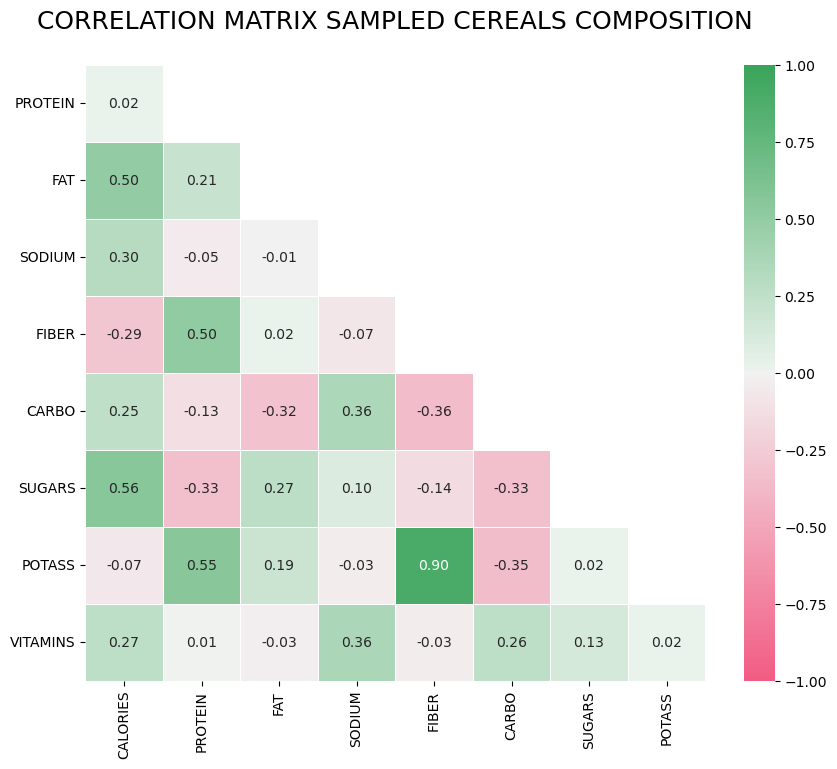

In [27]:
fig,ax = plt.subplots(figsize = (10,8))

# That method uses HUSL colors, so you need hue, saturation, and lightness
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0,135,84,60, as_cmap=True )

sns.heatmap(data = adjusted_cereal_corr,mask = adjusted_mask,
           annot = True , fmt = ".2f", cmap = cmap, vmin = -1,vmax = 1,
           linecolor = "white", linewidths = 0.5);

yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]
ax.set_yticklabels(yticks, rotation = 0);
ax.set_xticklabels(xticks, rotation = 90);

name = "CORRELATION MATRIX SAMPLED CEREALS COMPOSITION\n"
ax.set_title(name,loc="center",fontsize = 18);